In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
data=datasets.load_diabetes()

In [7]:
#data.feature_names
#data.DESCR
X=data.data
Y=data.target

In [8]:
print(X.shape,Y.shape)

(442, 10) (442,)


In [11]:
X=pd.DataFrame(X,columns=data.feature_names)
#print(X.head())
print('''X.info()''',X.describe())

X.info()                 age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.634285e-16  1.308343e-16 -8.045349e-16  1.281655e-16 -8.835316e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123996e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665645e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670611e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564384e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320442e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   1.327024e-16 -4.574646e-16  3.777301e-16 -3.830854e-16 -3.412882e-16  
std    4.761905e-02  4.761905e-02  4.761905e-

In [13]:
#print(X.isna().sum())

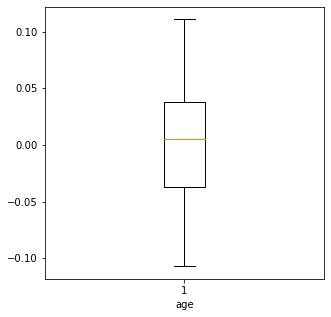

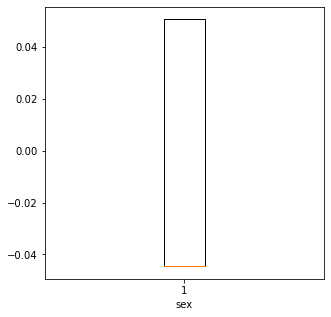

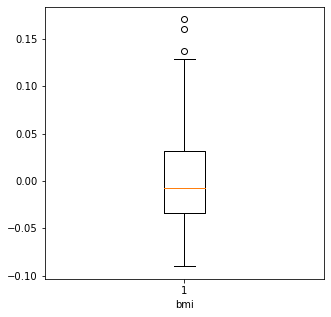

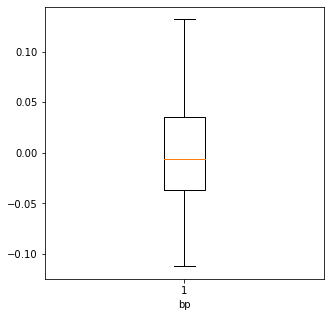

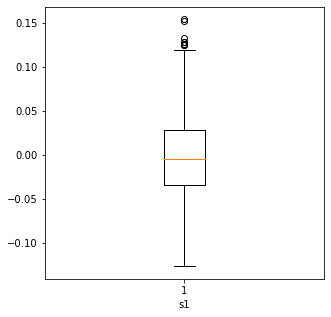

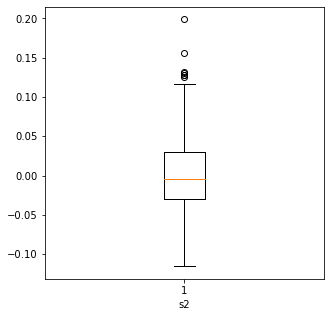

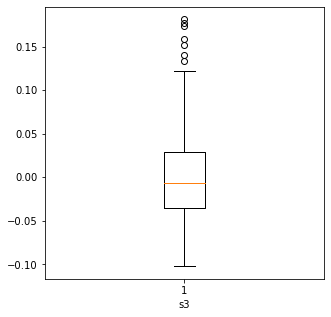

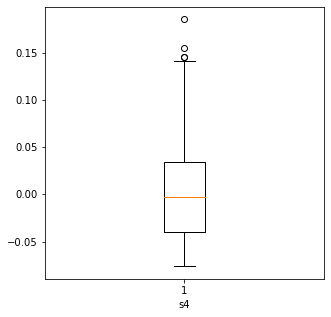

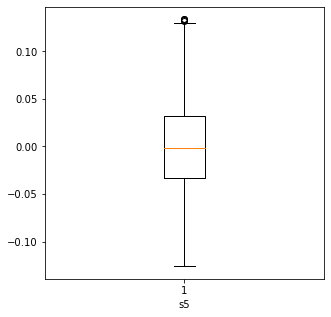

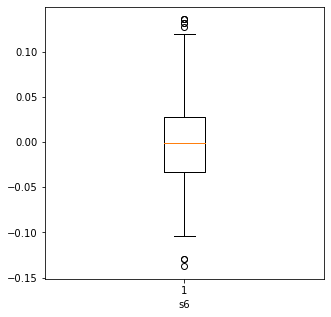

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in X.columns:
    plt.subplots(figsize=(5,5))
    plt.boxplot(X[i])
    plt.xlabel(i)

<AxesSubplot:>

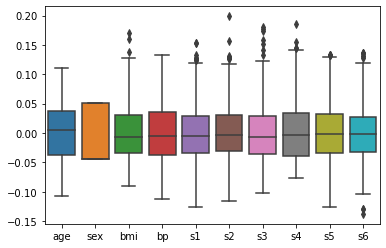

In [30]:
sns.boxplot(data=X)

<AxesSubplot:>

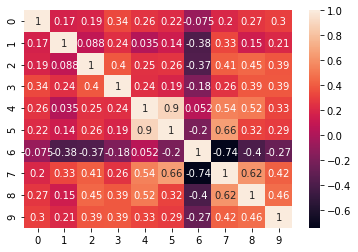

In [34]:
#Correlation matrix
cr=np.corrcoef(X.values.T)
#print(cr)
sns.heatmap(cr,annot=True)

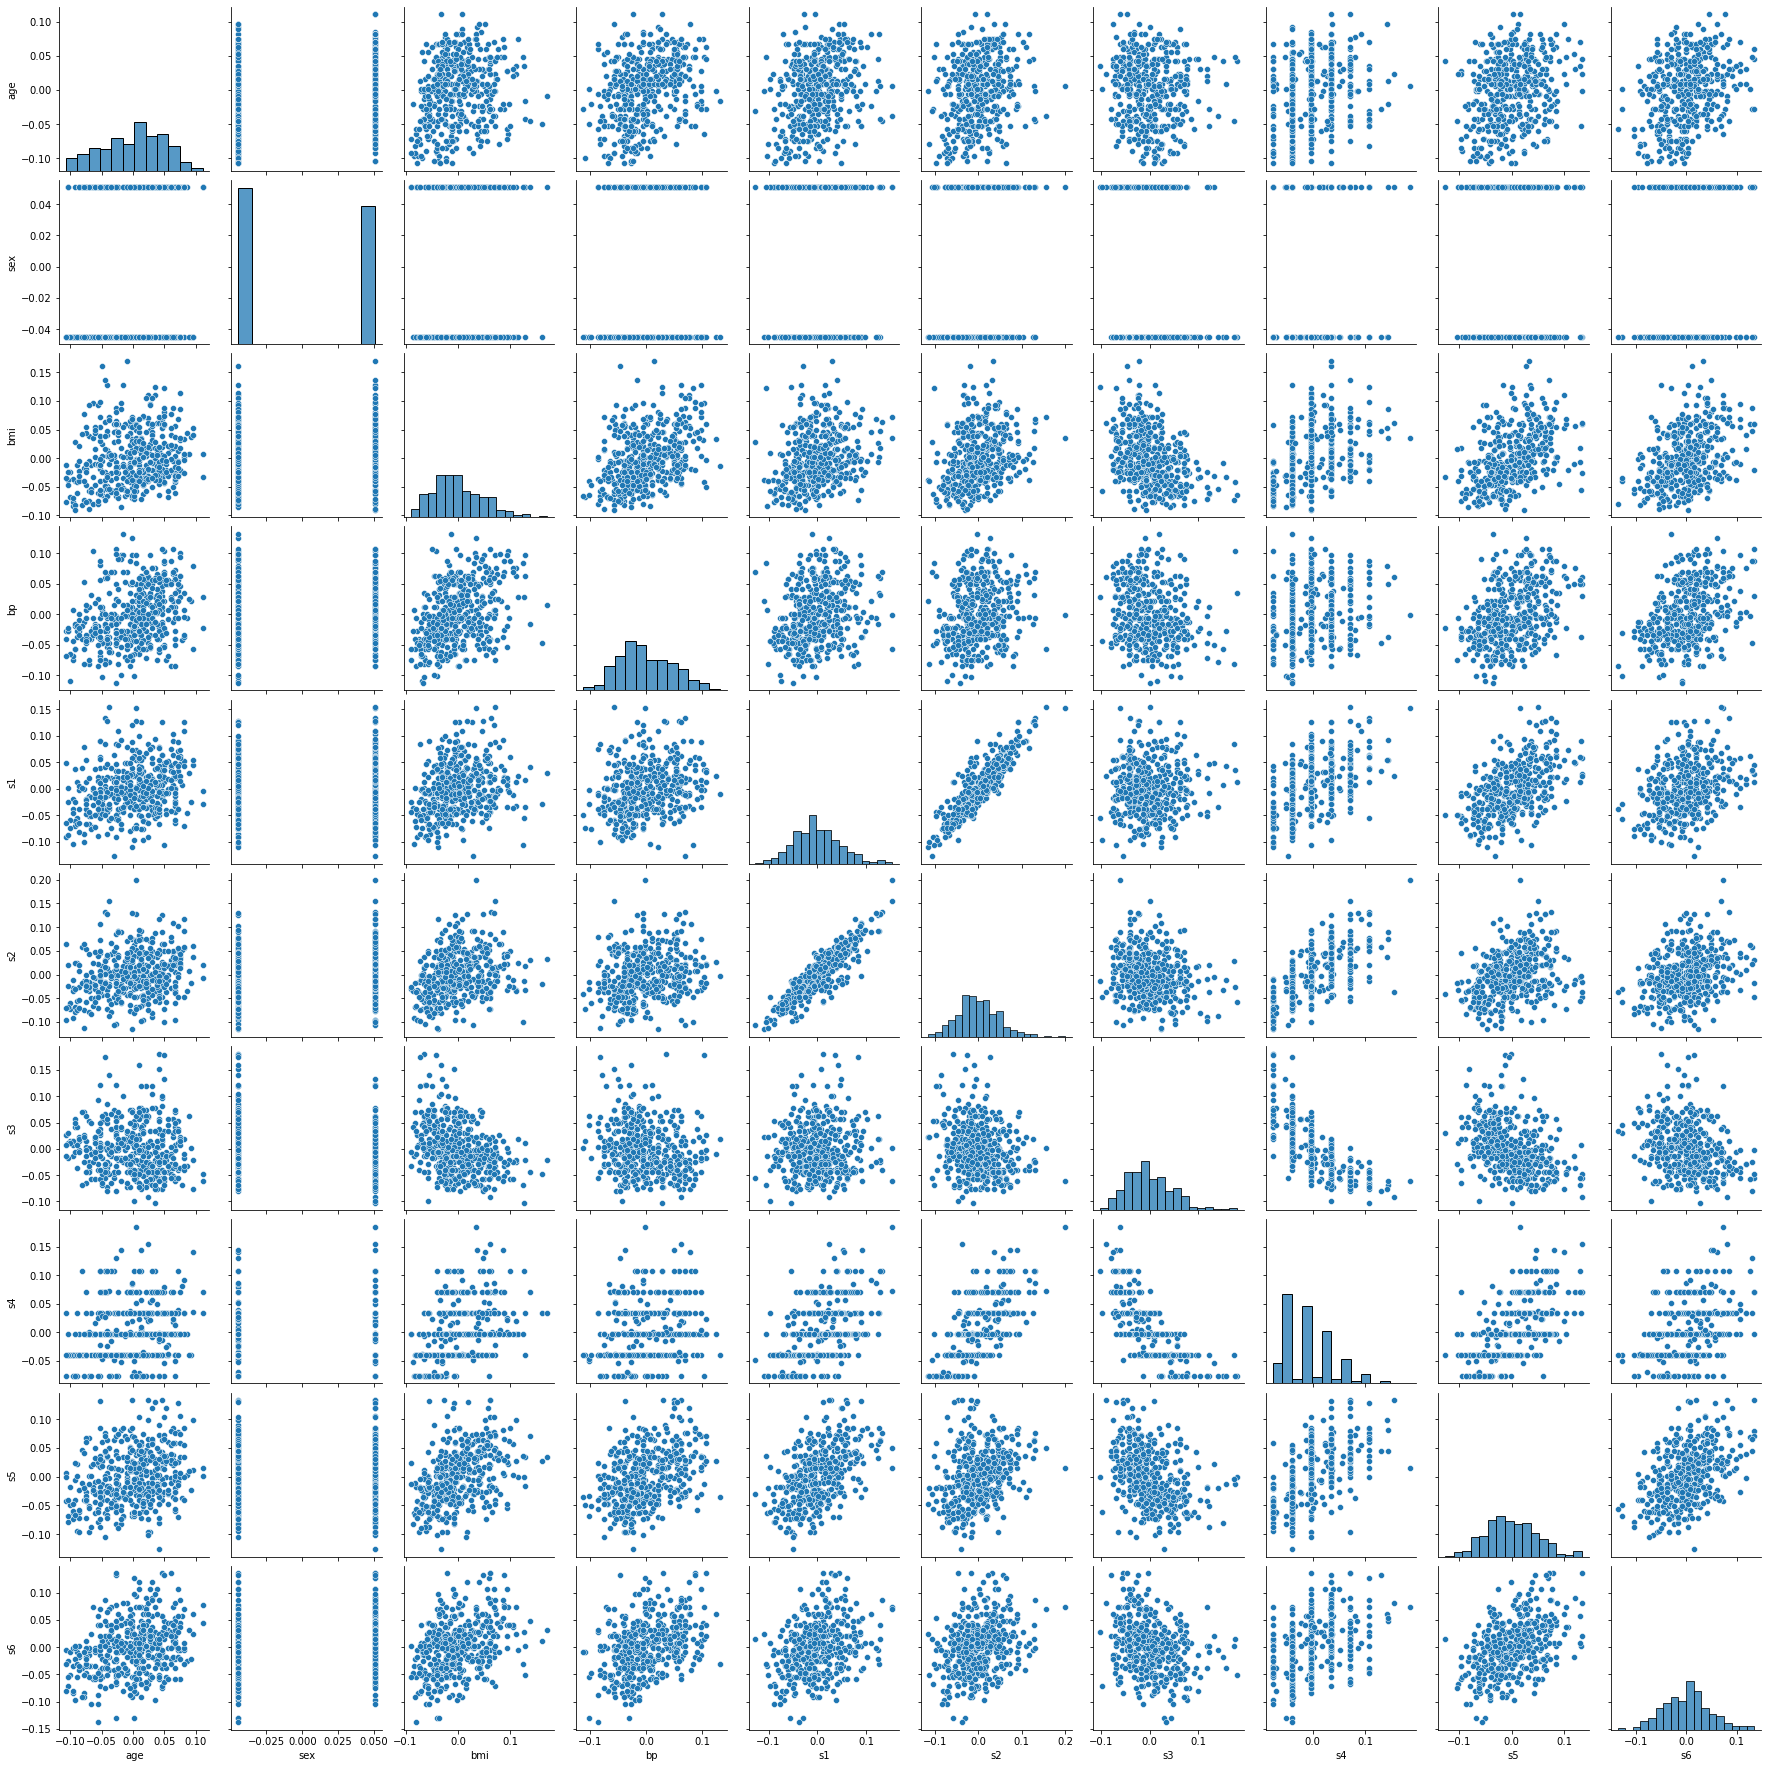

In [35]:
sns.pairplot(X)

<AxesSubplot:>

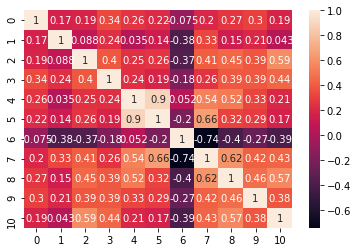

In [38]:
X['target']=Y
#print(X.head())
cr=np.corrcoef(X.values.T)
#print(cr)
sns.heatmap(cr,annot=True)

In [49]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X.iloc[:,[2,8]],Y,
                                          test_size=0.3)
print(xtrain.shape,xtest.shape)

(309, 2) (133, 2)


In [50]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
pred=lr.predict(xtest)
print('MSE',np.sum((ytest-pred)**2)/xtest.shape[0])

MSE 3353.5735319338564


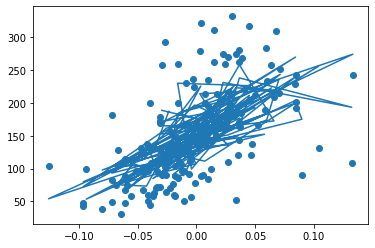

In [69]:
plt.scatter(xtest.iloc[:,1],ytest)
plt.plot(xtest.iloc[:,1],pred)
plt.show()
